In [2]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from matplotlib.ticker import MultipleLocator

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [3]:
from funcs.imgproc import get_imgs_designmx, show_stim, get_rms_contrast, get_contrast_df, get_img_prf
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict
from funcs.utility import print_dict_structure, print_large, get_zscore, hypotheses_plot


In [6]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

In [7]:
testdf = get_contrast_df(21, start_img_no = 0, roi = 'V1', subject = 'subj01', ecc_max = 1, ecc_strict = 'y', prf_proc_dict = prf_dict, binary_masks = vismask_dict, rf_type = 'center')


Processing image number: 0 out of 21
Processing image number: 10 out of 21
Processing image number: 20 out of 21


In [12]:
rms_subj01 = pd.read_pickle('/home/rfpred/rms_df_subj01.pkl')
rms_subj01.shape[0]

30000

In [13]:
# Standardize the root mean square values by turning them into z-scores
rms_z = get_zscore(rms_subj01['rms'], print_ars = 'n')
rms_subj01['rms'] = rms_z

In [14]:
rms_subj01


,rms,image_id,roi,subject
0,-0.166415,46002,V1,subj01
1,3.080989,61882,V1,subj01
2,-0.859298,828,V1,subj01
3,-0.857944,67573,V1,subj01
4,0.528501,16020,V1,subj01
...,...,...,...,...
29995,0.219800,13773,V1,subj01
29996,0.618843,66767,V1,subj01
29997,0.623565,53167,V1,subj01
29998,1.721059,1943,V1,subj01


In [22]:
# !{sys.executable} -m pip install scikit-image
from skimage import color

In [42]:
def rgb_to_lab(rgb_img):
    return color.rgb2lab(rgb_img)

def get_rms_contrast_lab(lab_image, mask_w_in, rf_mask_in, normalise = True):
    L = lab_image[:, :, 0] # Extract the L* channel for luminance values
    
    means_L = np.mean(L)
    
    ar_in = means_L
    
    if normalise == True:
        ar_in = ar_in/np.max(ar_in)
        
    
        
    
    rms_contrast = np.sqrt(np.mean((L - means_L)**2))
    
    return rms_contrast


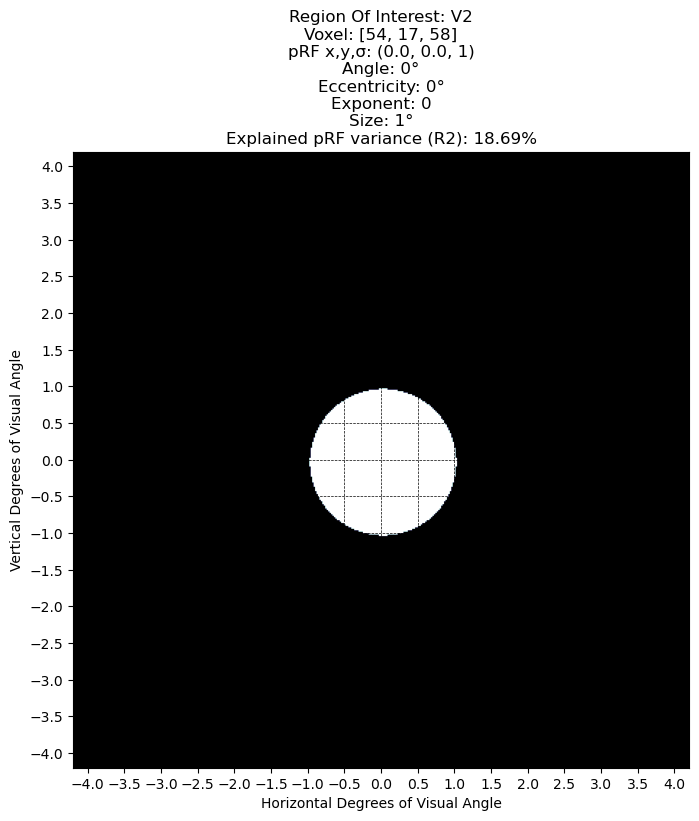

In [60]:
info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=0, sigma_max = 1.2, 
                                        ecc_max = 1, fill_outline = 'y', grid = 'y')


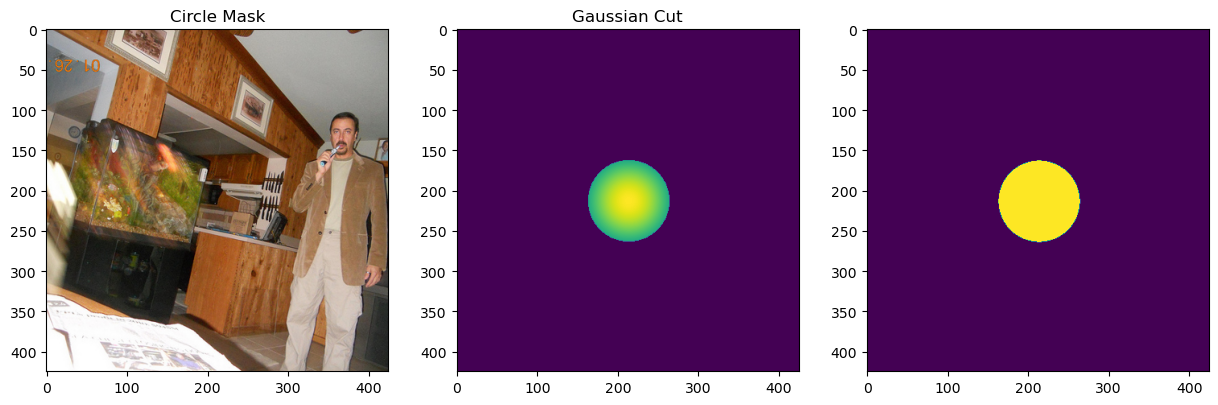

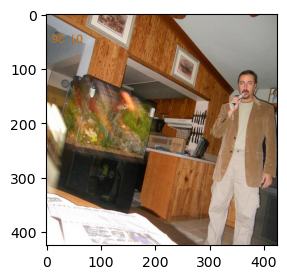

In [72]:
img = show_stim(hide = 'y')[0]

import matplotlib.pyplot as plt

# Assuming make_circle_mask and css_gaussian_cut are functions that return images

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image in the first subplot
axs[0].imshow(img)
axs[0].set_title('Circle Mask')

# Plot the second image in the second subplot
axs[1].imshow(css_gaussian_cut(425, 213, 213, (425/8.4)))
axs[1].set_title('Gaussian Cut')

axs[2].imshow(info['mask'])

# Display the subplots
plt.show()


plt.figure(figsize=(3, 3))  # Adjust the width and height as needed
plt.imshow(img)
plt.show()

In [78]:
def get_rms_contrast(ar_in,mask_w_in,rf_mask_in,normalise=True):

    """
    rms contrast, computing contrast with respect to uniform mean
    Args:

    ar_in (_type_): image array in

    mask_w_in (_type_): weighted receptive field (e.g. guass), sums to one

    rf_mask_in (_type_): boolean mask of receptive field

    normalise (bool, optional): _description_. Defaults to True.
    """
    ar_gray = np.mean(ar_in, axis = -1)
    ar_in = ar_gray
    
    if normalise == True:
        ar_in = ar_in/np.max(ar_in)
        
    square_contrast=np.square((ar_in-(ar_in[rf_mask_in].mean())))

    msquare_contrast=(mask_w_in*square_contrast).sum()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))


    axs[0].imshow(square_contrast)
    axs[1].imshow(mask_w_in*square_contrast)

    # mean square contrast
    return(np.sqrt(msquare_contrast))
    # root mean square contrast

18.822530971941834

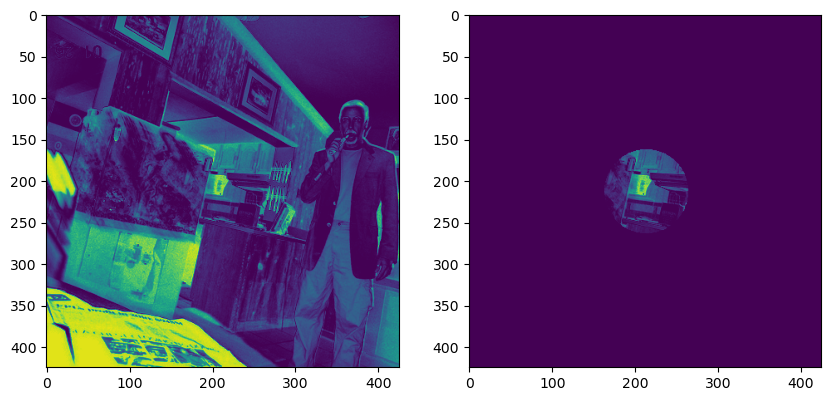

In [79]:
get_rms_contrast(img, css_gaussian_cut(425, 213, 213, (425/8.4)), info['mask'])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMS Contrast: 31.68
[[[  53.24059   80.09231   67.20275]
  [  87.7351   -86.18303   83.1797 ]
  [  32.29567   79.18559 -107.8573 ]]

 [[  97.13951  -21.55468   94.47812]
  [  91.1133   -48.0906   -14.12633]
  [  60.32351   98.23305  -60.82102]]

 [[ 100.        -0.00245    0.00465]
  [  53.58501   -0.00147    0.00279]
  [   0.         0.         0.     ]]]


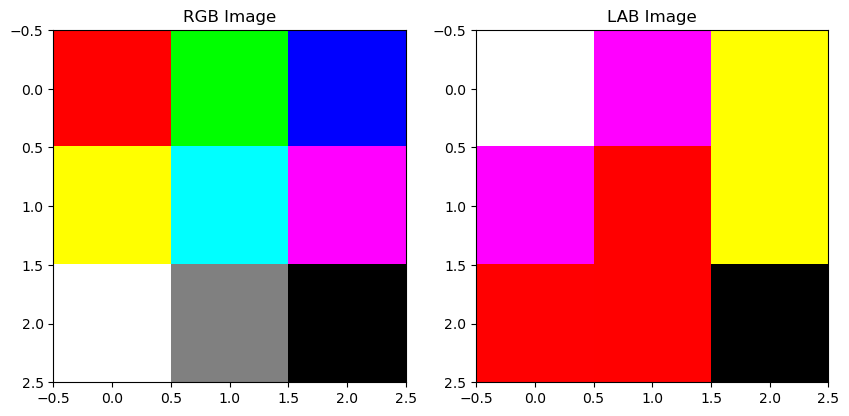

In [43]:
rgb_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]]
], dtype=np.uint8)

lab_image = rgb_to_lab(rgb_image)
rms_contrast = get_rms_contrast_lab(lab_image)


print(f"RMS Contrast: {rms_contrast:.2f}")

print(lab_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(lab_image)
plt.title('LAB Image')

plt.show()

In [34]:
# !{sys.executable} -m conda install colorsys


/home/rfpred/envs/rfenv/bin/python3.11: No module named conda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMS Contrast: 23.570306590402158
RMS Contrast: 23.57
[[[  53.24059   80.09231   67.20275]
  [  87.7351   -86.18303   83.1797 ]
  [  32.29567   79.18559 -107.8573 ]]

 [[  97.13951  -21.55468   94.47812]
  [  91.1133   -48.0906   -14.12633]
  [  60.32351   98.23305  -60.82102]]

 [[ 100.        -0.00245    0.00465]
  [  53.58501   -0.00147    0.00279]
  [   0.         0.         0.     ]]]


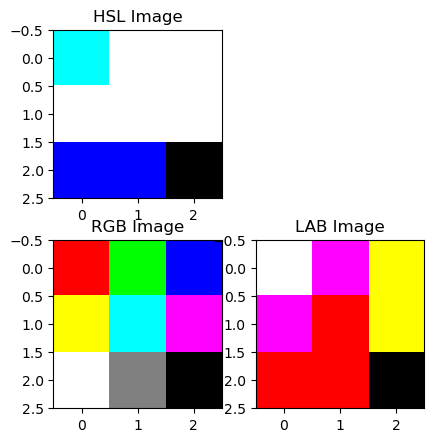

In [41]:
import numpy as np
import colorsys

def rgb_to_hsl(rgb_img):
    hsl_image = np.zeros_like(rgb_img, dtype=float)
    for i in range(rgb_img.shape[0]):
        for j in range(rgb_img.shape[1]):
            r, g, b = rgb_img[i, j] / 255.0
            h, l, s = colorsys.rgb_to_hls(r, g, b)
            hsl_image[i, j] = [h * 360, s * 100, l * 100]
    return hsl_image

def compute_rms_contrast(hsl_image):
    L = hsl_image[:, :, 2]  # Extract the Lightness (L) channel
    mean_L = np.mean(L)
    rms_contrast = np.sqrt(np.mean((L - mean_L)**2))
    return rms_contrast

rgb_image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]]
], dtype=np.uint8)

hsl_image = rgb_to_hsl(rgb_image)
rms_contrast = compute_rms_contrast(hsl_image)

print("RMS Contrast:", rms_contrast)
print(f"RMS Contrast: {rms_contrast:.2f}")

print(lab_image)

plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title('RGB Image')

plt.subplot(1, 4, 2)
plt.imshow(lab_image)
plt.title('LAB Image')

plt.subplot(2, 4, 1)
plt.imshow(hsl_image)
plt.title('HSL Image')

plt.show()

In [ ]:
# Function to get rms contrast for input image, mask patch, and weighted mask
def get_rms_contrast(ar_in,mask_w_in,rf_mask_in,normalise=True):

    """
    rms contrast, computing contrast with respect to uniform mean
    Args:

    ar_in (_type_): image array in

    mask_w_in (_type_): weighted receptive field (e.g. guass), sums to one

    rf_mask_in (_type_): boolean mask of receptive field

    normalise (bool, optional): _description_. Defaults to True.
    """
    ar_gray = np.mean(ar_in, axis = -1)
    ar_in = ar_gray
    
    if normalise == True:
        ar_in = ar_in/np.max(ar_in)
        
    square_contrast=np.square((ar_in-(ar_in[rf_mask_in].mean())))

    msquare_contrast=(mask_w_in*square_contrast).sum()
    
    # mean square contrast
    return(np.sqrt(msquare_contrast))
    # root mean square contrast

In [ ]:
def get_rms_hsl(n_images = None, start_img_no = 0 ,roi = 'V1', subject = 'subj01', ecc_max = 1, ecc_strict = 'y', 
                     prf_proc_dict = None, binary_masks = None, rf_type = 'prf'):
    
    designmx = get_imgs_designmx()
    
    if n_images == 'all':
        n_images = len(designmx['subj01'])
    
    indices, rms_list, image_id_list= [], [], []
      
    for img_no in range(start_img_no, n_images + start_img_no):
        ar_in = show_stim(img_no = img_no, hide = 'y')[0]
        
        if rf_type == 'prf':
            # Acquire mask based on subject, roi, outline. Type is cut_gaussian by default, based on NSD paper
            rf_info = get_mask(dim = 425, subject = subject, binary_masks = binary_masks, 
                                            prf_proc_dict = prf_proc_dict, type='cut_gaussian', roi=roi,
                                            plot = 'n', excl_reason = 'n', sigma_min=0, sigma_max = 4.2, 
                                            ecc_max = ecc_max, ecc_strict = ecc_strict)
            
            # Get the location and radius of the patch
            x, y = rf_info['x'].astype('int'), rf_info['y'].astype('int')
            radius = rf_info['pix_radius'].astype('int')
            mask_w_in = rf_info['mask']
            
            # Create boolean mask of exact same size as weighted pRF patch
            rf_mask_in = make_circle_mask(425, x, y, radius, fill = 'y', margin_width = 0)
            
        elif rf_type == 'center':
            dim = ar_in.shape[0]
            x = y = (dim + 1)/2
            radius = ecc_max * (dim / 8.4)
            mask_w_in = css_gaussian_cut(dim, x, y, radius)
            rf_mask_in = make_circle_mask(dim, x, y, radius, fill = 'y', margin_width = 0)
            
        # Get root mean square contrast of image and add to list
        indices.append(img_no)
        rms_list.append(get_rms_contrast(ar_in, mask_w_in, rf_mask_in, normalise = True))
        image_id_list.append(designmx[subject][img_no])
        # roi_list.append(roi)
        # subject_list.append(subject)
        if img_no % 10 == 0:
            print(f"Processing image number: {img_no} out of {n_images + start_img_no}")

    contrast_df = pd.DataFrame({
        'rms': rms_list,
        'image_id': image_id_list
        # 'roi': roi_list,
        # 'subject': subject_list
    })
    
    # Remove this roi thing, or well, only when rf_type = 'center'
    contrast_df.insert(2, 'roi', [roi] * contrast_df.shape[0])
    contrast_df.insert(3, 'subject', [subject] * contrast_df.shape[0])
    contrast_df.insert(4, 'central_radius', [ecc_max] * contrast_df.shape[0])
    
    contrast_df = contrast_df.set_index(np.array(indices))
    
    return contrast_df